In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_2014_add = pd.read_csv(filepath_or_buffer="2014_add.csv", encoding="utf-8", sep=",")
data_condition = pd.read_csv(filepath_or_buffer="condition.csv", encoding="utf-8", sep=",")
data_condition_add = pd.read_csv(filepath_or_buffer="condition_add.csv", encoding="utf-8", sep=",")
data_sample_submit = pd.read_csv(filepath_or_buffer="sample_submit.csv", encoding="utf-8", sep=",")
data_stadium = pd.read_csv(filepath_or_buffer="stadium.csv", encoding="utf-8", sep=",")
test2 = pd.read_csv(filepath_or_buffer="test-2.csv", encoding="utf-8", sep=",")
train2 = pd.read_csv(filepath_or_buffer="train-2.csv", encoding="utf-8", sep=",")
train_add = pd.read_csv(filepath_or_buffer="train_add.csv", encoding="utf-8", sep=",")

In [109]:
dat_condition = pd.concat([data_condition,data_condition_add])

In [110]:
train = pd.concat([train2,train_add])

In [111]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [112]:
df = pd.merge(train , dat_condition ,on = "id")

In [113]:
data_stadium2 = pd.read_csv(filepath_or_buffer="stadium.csv", encoding="utf-8", sep=",")
data_stadium2 = data_stadium2.rename(columns={"name":"stadium", "address":"address","capa":"capa"})

all_train_df = pd.merge(df ,data_stadium2 , on="stadium" )

In [114]:
df2 = pd.merge(test2 , dat_condition ,on = "id")

In [115]:
all_test_df = pd.merge(df2 ,data_stadium2 , on="stadium" )

In [116]:
#前処理

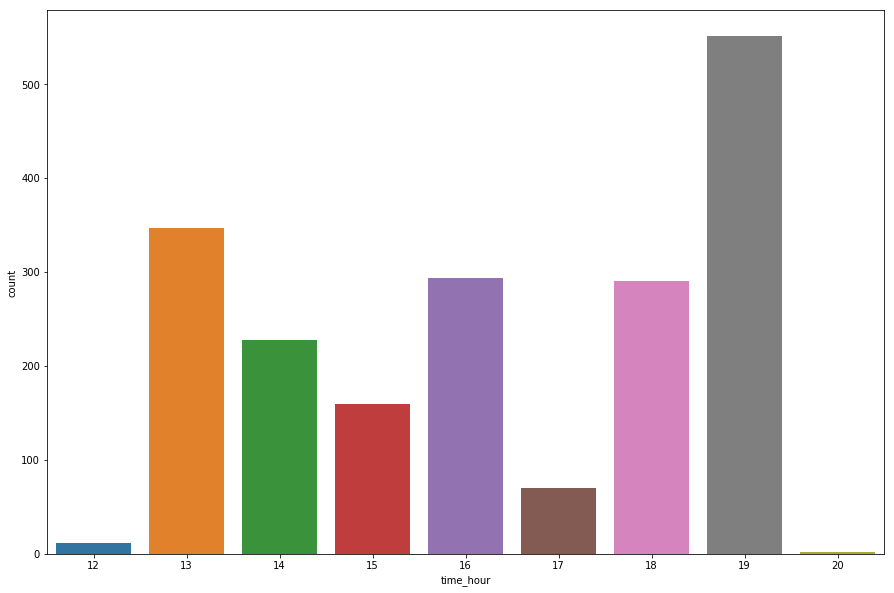

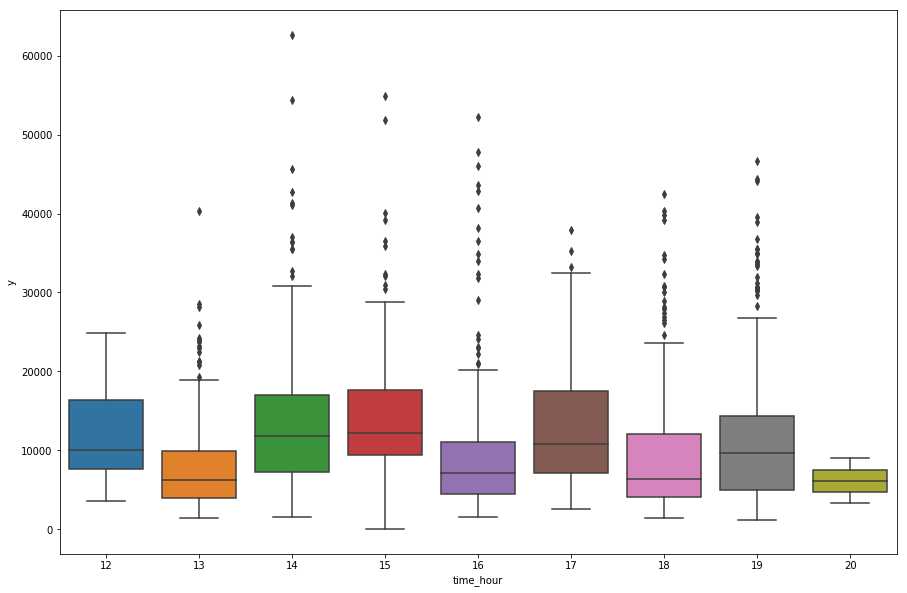

In [118]:
plt.figure(figsize=(15, 10))
sns.countplot(all_train_df['time_hour'])

plt.figure(figsize=(15,10))
sns.boxplot(x="time_hour",y="y",data=all_train_df)

#１２〜１４,15~17,18~で分けて考えてく。昼、夕、ナイター

In [119]:
#チーム名をマッピングする

In [120]:
team =all_train_df["home"].unique()
print(len(team))
print("")

team_mapping = {name:i for(i,name) in enumerate(team)}
print(team_mapping)

43

{'ベガルタ仙台': 0, '名古屋グランパス': 1, 'ガンバ大阪': 2, 'サンフレッチェ広島': 3, 'コンサドーレ札幌': 4, 'サガン鳥栖': 5, '川崎フロンターレ': 6, '大宮アルディージャ': 7, '柏レイソル': 8, '浦和レッズ': 9, '横浜Ｆ・マリノス': 10, 'アルビレックス新潟': 11, 'セレッソ大阪': 12, '清水エスパルス': 13, 'ジュビロ磐田': 14, 'ヴィッセル神戸': 15, 'ＦＣ東京': 16, '東京ヴェルディ': 17, '鹿島アントラーズ': 18, '横浜ＦＣ': 19, 'ヴァンフォーレ甲府': 20, '水戸ホーリーホック': 21, 'ＦＣ岐阜': 22, 'ファジアーノ岡山': 23, 'アビスパ福岡': 24, '大分トリニータ': 25, '愛媛ＦＣ': 26, '湘南ベルマーレ': 27, 'ギラヴァンツ北九州': 28, '栃木ＳＣ': 29, 'ＦＣ町田ゼルビア': 30, '松本山雅ＦＣ': 31, '徳島ヴォルティス': 32, 'ザスパ草津': 33, 'ザスパクサツ群馬': 34, 'ロアッソ熊本': 35, '京都サンガF.C.': 36, 'ガイナーレ鳥取': 37, 'モンテディオ山形': 38, 'カターレ富山': 39, 'ジェフユナイテッド千葉': 40, 'Ｖ・ファーレン長崎': 41, 'カマタマーレ讃岐': 42}


In [121]:
all_train_df["home"] = all_train_df["home"].map(team_mapping)
all_train_df["away"] = all_train_df["away"].map(team_mapping)

all_test_df["home"] = all_test_df["home"].map(team_mapping)
all_test_df["away"] = all_test_df["away"].map(team_mapping)

In [122]:
#スタジアムマッピング

In [123]:
stadium =all_train_df["stadium"].unique()
stadium1 = {name:i for(i,name) in enumerate(stadium)}
all_train_df["stadium"] = all_train_df["stadium"].map(stadium1)
all_test_df["stadium"] = all_test_df["stadium"].map(stadium1)

In [124]:
ave_fan = all_train_df.groupby(by='home').mean()['y']
ave_fandf = pd.DataFrame({'team':list(ave_fan.index),'ave_fan':list(ave_fan)})



all_train_df = pd.merge(all_train_df ,ave_fandf.rename(columns={'team':'home','ave_fan':'home_ave_fan'}),on = 'home')
all_train_df = pd.merge(all_train_df ,ave_fandf.rename(columns={'team':'away','ave_fan':'away_ave_fan'}),on = 'away')
all_test_df = pd.merge(all_test_df ,ave_fandf.rename(columns={'team':'home','ave_fan':'home_ave_fan'}),on = 'home')
all_test_df = pd.merge(all_test_df ,ave_fandf.rename(columns={'team':'away','ave_fan':'away_ave_fan'}),on = 'away')


In [125]:
all_train_df

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_08,away_09,away_10,away_11,address,capa,match_sec,time_hour,home_ave_fan,away_ave_fan
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,0,18,0,...,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,1,14,15353.904762,15814.738095
1,15009,17892,2013,Ｊ１,第２０節第１日,08/10(土),19:04,0,18,0,...,遠藤 康,中村 充孝,野沢 拓也,大迫 勇也,宮城県仙台市泉区七北田字柳78,19694,20,19,15353.904762,15814.738095
2,14287,23892,2012,Ｊ１,第３３節第１日,11/24(土),14:33,1,18,1,...,遠藤 康,ドゥトラ,ジュニーニョ,大迫 勇也,愛知県豊田市千石町7-2,40000,33,14,17226.744186,15814.738095
3,14997,15881,2013,Ｊ１,第１８節第１日,07/31(水),19:34,1,18,1,...,野沢 拓也,ジュニーニョ,大迫 勇也,ダヴィ,愛知県豊田市千石町7-2,40000,18,19,17226.744186,15814.738095
4,14234,14163,2012,Ｊ１,第２７節第１日,09/29(土),16:03,2,18,2,...,柴崎 岳,ドゥトラ,レナト,大迫 勇也,大阪府吹田市千里万博公園5-2,21000,27,16,13449.891304,15814.738095
5,15721,12899,2014,Ｊ１,第６節第１日,04/06(日),16:03,2,18,2,...,遠藤 康,カイオ,土居 聖真,ダヴィ,大阪府吹田市千里万博公園5-2,21000,6,16,13449.891304,15814.738095
6,14013,14349,2012,Ｊ１,第３節第１日,03/24(土),13:04,3,18,3,...,柴崎 岳,遠藤 康,ジュニーニョ,大迫 勇也,広島県広島市安佐南区大塚西5-1-1,50000,3,13,16494.209302,15814.738095
7,14862,16029,2013,Ｊ１,第３節第２日,03/17(日),13:06,3,18,3,...,野沢 拓也,ジュニーニョ,大迫 勇也,ダヴィ,広島県広島市安佐南区大塚西5-1-1,50000,3,13,16494.209302,15814.738095
8,15749,16992,2014,Ｊ１,第９節第１日,04/26(土),19:04,3,18,3,...,遠藤 康,カイオ,土居 聖真,ダヴィ,広島県広島市安佐南区大塚西5-1-1,50000,9,19,16494.209302,15814.738095
9,14246,7208,2012,Ｊ１,第２９節第１日,10/20(土),16:03,4,18,22,...,興梠 慎三,ドゥトラ,レナト,大迫 勇也,北海道札幌市厚別区上野幌3条1-2-1,19620,29,16,10837.254902,15814.738095


In [126]:
#スタジアム平均観客数

In [127]:
ave_stadium = all_train_df.groupby(by='stadium').mean()['y']

ave_stadiumdf = pd.DataFrame({'stadium':list(ave_stadium.index),'ave_stadium':list(ave_stadium)})
all_train_df = pd.merge(all_train_df ,ave_stadiumdf ,on='stadium')
all_test_df = pd.merge(all_test_df,ave_stadiumdf,on='stadium')

In [128]:
all_train_df

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_09,away_10,away_11,address,capa,match_sec,time_hour,home_ave_fan,away_ave_fan,ave_stadium
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,0,18,0,...,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,1,14,15353.904762,15814.738095,15309.292683
1,15009,17892,2013,Ｊ１,第２０節第１日,08/10(土),19:04,0,18,0,...,中村 充孝,野沢 拓也,大迫 勇也,宮城県仙台市泉区七北田字柳78,19694,20,19,15353.904762,15814.738095,15309.292683
2,14012,11831,2012,Ｊ１,第３節第１日,03/24(土),13:03,0,7,0,...,曺 永哲,東 慶悟,ラファエル,宮城県仙台市泉区七北田字柳78,19694,3,13,15353.904762,10790.904762,15309.292683
3,14927,14327,2013,Ｊ１,第１１節第１日,05/11(土),14:04,0,7,0,...,曺 永哲,ズラタン,ノヴァコヴィッチ,宮城県仙台市泉区七北田字柳78,19694,11,14,15353.904762,10790.904762,15309.292683
4,14031,13147,2012,Ｊ１,第５節第１日,04/07(土),14:03,0,14,0,...,松浦 拓弥,菅沼 実,前田 遼一,宮城県仙台市泉区七北田字柳78,19694,5,14,15353.904762,11127.808511,15309.292683
5,14973,14318,2013,Ｊ１,第１６節第１日,07/13(土),19:04,0,14,0,...,ペク ソンドン,松浦 拓弥,前田 遼一,宮城県仙台市泉区七北田字柳78,19694,16,19,15353.904762,11127.808511,15309.292683
6,14055,17192,2012,Ｊ１,第７節第１日,04/21(土),19:04,0,16,0,...,大竹 洋平,羽生 直剛,渡邉 千真,宮城県仙台市泉区七北田字柳78,19694,7,19,15353.904762,24486.534884,15309.292683
7,14882,13655,2013,Ｊ１,第６節第１日,04/13(土),14:04,0,16,0,...,東 慶悟,長谷川 アーリアジャスール,渡邉 千真,宮城県仙台市泉区七北田字柳78,19694,6,14,15353.904762,24486.534884,15309.292683
8,14075,18525,2012,Ｊ１,第１０節第１日,05/06(日),13:04,0,13,0,...,ジミー フランサ,大前 元紀,高木 俊幸,宮城県仙台市泉区七北田字柳78,19694,10,13,15353.904762,14492.500000,15309.292683
9,15124,17394,2013,Ｊ１,第３３節第１日,11/30(土),17:04,0,13,0,...,大前 元紀,伊藤 翔,ラドンチッチ,宮城県仙台市泉区七北田字柳78,19694,33,17,15353.904762,14492.500000,15309.292683


In [129]:
#J1:0,J2:1

In [130]:
stage =all_train_df["stage"].unique()
stage1 = {name:i for(i,name) in enumerate(stage)}
all_train_df["stage1"] = all_train_df["stage"].map(stage1)
all_test_df["stage1"] = all_test_df["stage"].map(stage1)

In [131]:
all_train_df["weather"].unique()

array(['雨', '晴', '曇時々雨', '曇', '曇のち雨', '晴のち雨', '曇一時雨', '晴時々雪', '屋内',
       '雨時々曇', '曇時々晴一時雨', '曇のち晴', '晴時々曇', '晴一時雨', '晴のち曇', '雨のち曇時々晴',
       '雨のち曇', '曇時々晴', '曇一時雨のち晴', '晴一時曇', '晴のち曇一時雨', '雨時々晴', '曇一時雷雨のち曇',
       '曇のち雷雨', '曇時々雨のち晴', '雨のち晴', '曇一時晴一時雨', '晴時々雨', '雪', '曇のち雪', '雪のち雨',
       '晴のち曇時々雨', '曇一時晴'], dtype=object)

In [132]:
all_train_df['okunai'] = all_train_df['weather'].apply(lambda x: 1 if '屋内' in x else 0)
all_train_df['ame'] = all_train_df['weather'].apply(lambda x: 1 if '雨' in x else 0)
all_train_df['yuki'] = all_train_df['weather'].apply(lambda x: 1 if '雪' in x else 0)
all_train_df['hare'] = all_train_df['weather'].apply(lambda x: 1 if '晴れ' in x else 0)
all_train_df['kumori'] = all_train_df['weather'].apply(lambda x: 1 if '曇り' in x else 0)

In [133]:
all_test_df['okunai'] = all_test_df['weather'].apply(lambda x: 1 if '屋内' in x else 0)
all_test_df['ame'] = all_test_df['weather'].apply(lambda x: 1 if '雨' in x else 0)
all_test_df['yuki'] = all_test_df['weather'].apply(lambda x: 1 if '雪' in x else 0)
all_test_df['hare'] = all_test_df['weather'].apply(lambda x: 1 if '晴れ' in x else 0)
all_test_df['kumori'] = all_test_df['weather'].apply(lambda x: 1 if '曇り' in x else 0)

In [134]:
#TV

In [135]:
all_train_df["tv"].unique()
tv1 = set()

for i in all_train_df["tv"].str.split("／"):
    tv1.update(i)

In [136]:
import re
clean_cas = set()

# ()と※より後ろを消す
# 小文字を大文字に統一
# ーを-に変換する
# スカパー軍は全てスカパーに統一

def cleanify(cas):
    cas = cas.upper()
    cas = re.sub("\（.+\）|\*", "", cas)
    cas = cas.split("※")[0]\
               .rstrip(" ")\
               .replace("ー", "-")\
               .replace(" ", "_")
    if cas[:4] == "スカパ-":
        cas = "スカパー"
    return cas

for cas in tv1:
    clean_cas.add(cleanify(cas))

In [137]:
tmp = all_train_df["tv"].str.split("／")\
                              .apply(lambda casters: [cleanify(cas) for cas in casters])
all_train_df["tv"] = tmp

for i in range(len(tmp)):
    tmp[i] = list(set(tmp[i]))

tmp

0              [ＮＨＫ総合, Ｅ２, スカパー]
1                         [スカパー]
2                     [Ｅ２, スカパー]
3                   [仙台放送, スカパー]
4       [ＮＨＫ静岡, ＮＨＫ仙台, Ｅ２, スカパー]
5                         [スカパー]
6            [Ｅ２, ＮＨＫ　ＢＳ１, スカパー]
7                         [スカパー]
8              [ＮＨＫ仙台, Ｅ２, スカパー]
9                  [ＮＨＫ仙台, スカパー]
10            [ミヤギテレビ, Ｅ２, スカパー]
11                    [Ｅ２, スカパー]
12                        [スカパー]
13          [ＮＨＫ仙台, ＮＨＫ広島, スカパー]
14                    [Ｅ２, スカパー]
15                        [スカパー]
16          [ＮＨＫ仙台, ＮＨＫ佐賀, スカパー]
17                    [Ｅ２, スカパー]
18                        [スカパー]
19                    [Ｅ２, スカパー]
20                 [ＮＨＫ総合, スカパー]
21                    [Ｅ２, スカパー]
22               [ＮＨＫ　ＢＳ１, スカパー]
23                        [スカパー]
24           [Ｅ２, ＮＨＫ　ＢＳ１, スカパー]
25                        [スカパー]
26               [ＮＨＫ　ＢＳ１, スカパー]
27                        [スカパー]
28                        [スカパー]
29                        [スカパー]
          

In [138]:
all_train_df["seisiki_tv"] = tmp

In [139]:
for i in range(len(tmp)):
    tmp[i] = list(set(tmp[i]))

tmp2 = np.zeros(len(tmp))
for i in range(len(tmp)):
    tmp2[i] = len(tmp[i])

all_train_df["tv_count"] = tmp2

In [140]:
#testも変更

In [141]:
all_test_df["tv"].unique()
tv1 = set()

for i in all_test_df["tv"].str.split("／"):
    tv1.update(i)

import re
clean_cas = set()

# ()と※より後ろを消す
# 小文字を大文字に統一
# ーを-に変換する
# スカパー軍は全てスカパーに統一

def cleanify(cas):
    cas = cas.upper()
    cas = re.sub("\（.+\）|\*", "", cas)
    cas = cas.split("※")[0]\
               .rstrip(" ")\
               .replace("ー", "-")\
               .replace(" ", "_")
    if cas[:4] == "スカパ-":
        cas = "スカパー"
    return cas

for cas in tv1:
    clean_cas.add(cleanify(cas))

tmp = all_test_df["tv"].str.split("／")\
                              .apply(lambda casters: [cleanify(cas) for cas in casters])
all_test_df["tv"] = tmp

for i in range(len(tmp)):
    tmp[i] = list(set(tmp[i]))

all_test_df["seisiki_tv"] = tmp

for i in range(len(tmp)):
    tmp[i] = list(set(tmp[i]))

tmp2 = np.zeros(len(tmp))
for i in range(len(tmp)):
    tmp2[i] = len(tmp[i])

all_test_df["tv_count"] = tmp2

In [150]:
all_train_df.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'match_sec', 'time_hour',
       'home_ave_fan', 'away_ave_fan', 'ave_stadium', 'stage1', 'okunai',
       'ame', 'yuki', 'hare', 'kumori', 'seisiki_tv', 'tv_count', 'weekday'],
      dtype='object')

In [143]:
#曜日

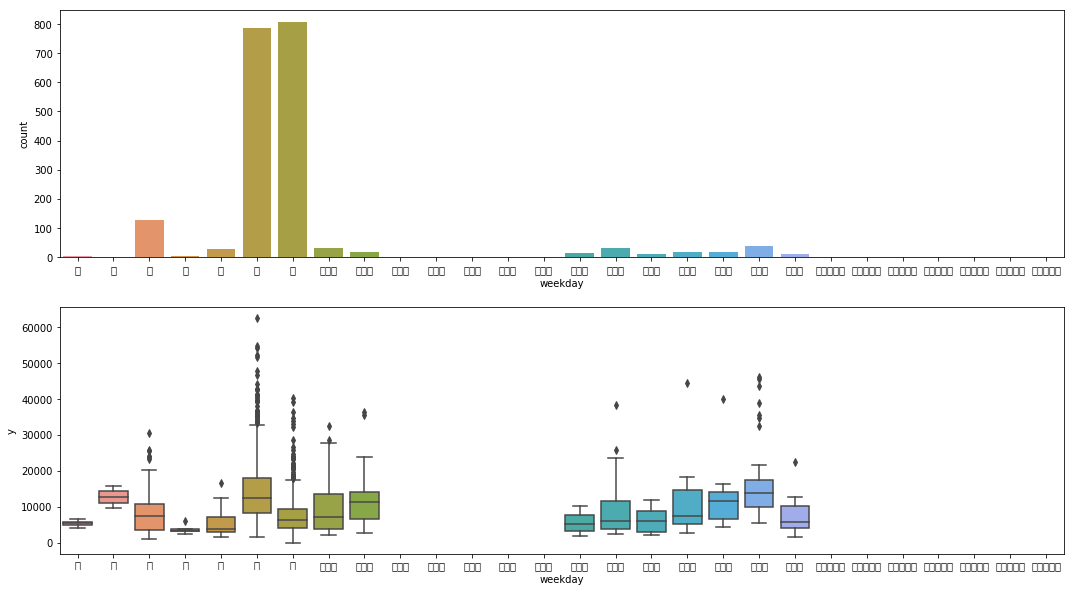

In [151]:
weeks = list('月火水木金土日')
weeks += [w + '・休' for w in weeks]
weeks += [w + '・祝' for w in weeks]

all_train_df['weekday'] = all_train_df['gameday'].apply(lambda x: x[:-1].rsplit('(', 1)[-1])
all_test_df['weekday'] = all_train_df['gameday'].apply(lambda x: x[:-1].rsplit('(', 1)[-1])


plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.countplot(all_train_df['weekday'], order=weeks)

plt.subplot(2, 1, 2)
sns.boxplot(x='weekday', y='y' , data=all_train_df, order=weeks)
plt.show()

In [152]:
weekday =all_train_df["weekday"].unique()
weekday1 = {name:i for(i,name) in enumerate(weekday)}
all_train_df["weekday"] = all_train_df["weekday"].map(weekday1)
all_test_df["weekday"] = all_test_df["weekday"].map(weekday1)

In [153]:
all_train_df.groupby(by='weekday').mean()['y']

weekday
0     14354.227735
1      7443.965304
2      8532.724409
3      9203.806452
4     17478.342105
5     12859.111111
6      5398.566667
7     10363.483871
8     12199.277778
9      7859.090909
10    12694.000000
11    10709.055556
12     5678.187500
13     5360.500000
14     6080.545455
15     3723.400000
Name: y, dtype: float64

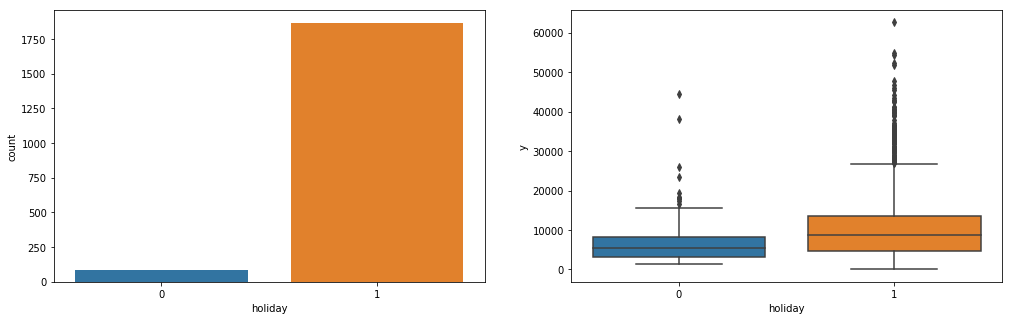

In [154]:
all_train_df['holiday'] = all_train_df['weekday'].apply(lambda x: 1 if x == 0 or x== 1 or x == 2 or x == 4 or x == 5 or x == 7 or x == 8 or x == 9 or x == 10 or x == 12 or x == 14 else 0)
all_test_df['holiday'] = all_test_df['weekday'].apply(lambda x: 1 if x == 0 or x== 1 or x == 2 or x == 4 or x == 5 or x == 7 or x == 8 or x == 9 or x == 10 or x == 12 or x == 14 else 0)


plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.countplot(all_train_df['holiday'])

plt.subplot(1, 2, 2)
sns.boxplot(x='holiday', y='y', data=all_train_df)
plt.show()

In [ ]:
#優秀選手

In [155]:
year_2012 =all_train_df[all_train_df.year==2012]
year_2013 =all_train_df[all_train_df.year==2013]
year_2014 =all_train_df[all_train_df.year==2014]

In [156]:
senshu_2012 = year_2012.loc[:,["id",'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11']]

senshu_2013 = year_2013.loc[:,["id",'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11']]

senshu_2014 = year_2014.loc[:,["id",'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11']]

test_senshu_2014 = all_test_df.loc[:,["id",'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11']]

In [157]:
#優秀選手リスト
yushu2012 = ["林　卓人","楢崎　正剛","西川　周作","上本　大海","駒野　友一","角田　誠","田中　マルクス闘莉王","鎌田　次郎","千葉　和彦","槙野　智章","水本　裕貴","栗原　勇蔵","森脇　良太","中澤　佑二","菅井　直樹","山田　大記","梁　勇基","遠藤　保仁","阿部　勇樹","柿谷　曜一朗","レアンドロ","青山　敏弘","中村　憲剛","高萩　洋次郎","中村　俊輔","森崎　和幸","赤嶺　真吾","前田　遼一","ウイルソン","佐藤　寿人","大前　元紀","豊田　陽平"]
yushu2013 =["榎本　哲也","キム　ジンヒョン","西川 周作","那須　大亮","槙野　智章","森重　真人","太田　宏介","栗原　勇蔵","ドゥトラ","小林　祐三","中澤　佑二","富澤　清太郎","山下　達也","水本　裕貴","塩谷　司","阿部　勇樹","中村　憲剛","中町　公祐","中村　俊輔","レオ　シルバ","山口　螢","柿谷　曜一朗","青山　敏弘","高萩　洋次郎","ミキッチ","大迫　勇也","レナト","大久保　嘉人","齋藤　学","マルキーニョス","川又　堅碁","佐藤　寿人"]
yushu2014 =["西川　周作","東口　順昭","林　彰洋","西　大伍","昌子　源","那須　大亮","槙野　智章","太田　宏介","森重　真人","今野　泰幸","米倉　恒貴","塩谷　司","水本　裕貴","安田　理大","遠藤　康","柴崎　岳","阿部　勇樹","柏木　陽介","武藤　嘉紀","大島　僚太","中村　憲剛","レオ　シルバ","阿部　浩之","遠藤　保仁","森岡　亮太","興梠　慎三","大久保　嘉人","小林　悠","レナト","宇佐美　貴史","パトリック","豊田　陽平"]

In [158]:
for i in range(len(yushu2012)):
    senshu_2012 = senshu_2012.replace(yushu2012[i],"代表2012")

for i in range(len(yushu2013)):
    senshu_2013 = senshu_2013.replace(yushu2013[i],"代表2013")
    

for i in range(len(yushu2014)):
    senshu_2014 = senshu_2014.replace(yushu2014[i],"代表2014")

In [159]:
for i in range(len(yushu2014)):
    test_senshu_2014 = test_senshu_2014.replace(yushu2014[i],"代表2014")

In [160]:
all_test_df.columns

Index(['id', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'match_sec', 'time_hour',
       'home_ave_fan', 'away_ave_fan', 'ave_stadium', 'stage1', 'okunai',
       'ame', 'yuki', 'hare', 'kumori', 'seisiki_tv', 'tv_count', 'weekday',
       'holiday'],
      dtype='object')

In [161]:
test_senshu_2014

,id,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,15822,関 憲太郎,菅井 直樹,渡辺 広大,鎌田 次郎,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,...,中村 北斗,今井 智基,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン
1,15840,関 憲太郎,菅井 直樹,鎌田 次郎,上本 大海,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,...,吉田 豊,平岡 康裕,杉山 浩太,イ キジェ,本田 拓也,六平 光成,大前 元紀,河井 陽介,高木 俊幸,ノヴァコヴィッチ
2,15863,関 憲太郎,菅井 直樹,鎌田 次郎,上本 大海,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,...,小林 祐三,栗原 勇蔵,中澤 佑二,下平 匠,中町 公祐,小椋 祥平,藤本 淳吾,中村 俊輔,兵藤 慎剛,伊藤 翔
3,15885,関 憲太郎,村上 和弘,鎌田 次郎,上本 大海,石川 直樹,太田 吉彰,富田 晋伍,梁 勇基,野沢 拓也,...,代表2014,青木 剛,代表2014,山本 脩斗,代表2014,小笠原 満男,代表2014,カイオ,土居 聖真,ダヴィ
4,15903,関 憲太郎,菅井 直樹,鎌田 次郎,上本 大海,石川 直樹,太田 吉彰,富田 晋伍,梁 勇基,野沢 拓也,...,徳永 悠平,代表2014,吉本 一謙,代表2014,高橋 秀人,米本 拓司,羽生 直剛,河野 広貴,エドゥー,代表2014
5,15912,関 憲太郎,菅井 直樹,鎌田 次郎,上本 大海,石川 直樹,太田 吉彰,富田 晋伍,梁 勇基,野沢 拓也,...,森脇 良太,代表2014,代表2014,平川 忠亮,代表2014,鈴木 啓太,宇賀神 友弥,代表2014,李 忠成,代表2014
6,15930,関 憲太郎,村上 和弘,鎌田 次郎,上本 大海,石川 直樹,太田 吉彰,富田 晋伍,梁 勇基,野沢 拓也,...,鈴木 大輔,増嶋 竜也,渡部 博文,橋本 和,キム チャンス,栗澤 僚一,秋野 央樹,ドゥドゥ,レアンドロ,工藤 壮人
7,15957,関 憲太郎,菅井 直樹,鎌田 次郎,角田 誠,石川 直樹,太田 吉彰,富田 晋伍,梁 勇基,野沢 拓也,...,村松 大輔,福元 洋平,橋内 優也,藤原 広太朗,那須川 将大,斉藤 大介,濱田 武,大﨑 淳矢,廣瀬 智靖,キム ジョンミン
8,15844,守田 達弥,松原 健,舞行龍ジェームズ,大井 健太郎,大野 和成,代表2014,小林 裕紀,山本 康裕,田中 亜土夢,...,中村 北斗,菊地 光将,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン
9,15940,守田 達弥,松原 健,舞行龍ジェームズ,大井 健太郎,小泉 慶,代表2014,小林 裕紀,田中 亜土夢,山本 康裕,...,代表2014,植田 直通,代表2014,前野 貴徳,代表2014,小笠原 満男,代表2014,豊川 雄太,土居 聖真,赤﨑 秀平


In [162]:
player_2012 = senshu_2012.values
player_2013 = senshu_2013.values
player_2014 = senshu_2014.values
test_player_2014 = test_senshu_2014.values

tmp4 = np.zeros(len(senshu_2012.loc[:,['home_01']]))
tmp5 = np.zeros(len(senshu_2013.loc[:,['home_01']]))
tmp6 = np.zeros(len(senshu_2014.loc[:,['home_01']]))
tmp7 = np.zeros(len(test_senshu_2014.loc[:,['home_01']]))

In [163]:
for i in range(len(tmp4)):
    ss = player_2012[i,]
    tmp4[i] = len(np.where(ss == '代表2012')[0])

senshu_2012["yushu"] = tmp4

In [164]:
for i in range(len(tmp5)):
    ss = player_2013[i,]
    tmp5[i] = len(np.where(ss == '代表2013')[0])

senshu_2013["yushu"] = tmp5

In [165]:
for i in range(len(tmp6)):
    ss = player_2014[i,]
    tmp6[i] = len(np.where(ss == '代表2014')[0])

senshu_2014["yushu"] = tmp6

In [166]:
for i in range(len(tmp7)):
    ss = test_player_2014[i,]
    tmp7[i] = len(np.where(ss == '代表2014')[0])

test_senshu_2014["yushu"] = tmp7

In [167]:
senshu_2014

,id,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,...,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,yushu
13,15793,関 憲太郎,菅井 直樹,渡辺 広大,角田 誠,石川 直樹,太田 吉彰,富田 晋伍,武井 択也,梁 勇基,...,千葉 和彦,代表2014,ミキッチ,柴﨑 晃誠,森﨑 和幸,清水 航平,森﨑 浩司,髙萩 洋次郎,佐藤 寿人,2.0
15,15732,関 憲太郎,菅井 直樹,渡辺 広大,石川 直樹,二見 宏志,太田 吉彰,富田 晋伍,鎌田 次郎,梁 勇基,...,キム ミンヒョク,坂井 達弥,代表2014,水沼 宏太,岡本 知剛,藤田 直之,金 民友,池田 圭,代表2014,3.0
23,15755,関 憲太郎,菅井 直樹,渡辺 広大,角田 誠,石川 直樹,太田 吉彰,富田 晋伍,武井 択也,梁 勇基,...,ジェシ,中澤 聡太,谷口 彰悟,代表2014,代表2014,森谷 賢太郎,代表2014,代表2014,代表2014,5.0
25,15768,関 憲太郎,武井 択也,渡辺 広大,鎌田 次郎,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,...,増川 隆洋,岩波 拓也,奥井 諒,チョン ウヨン,橋本 英郎,代表2014,ペドロ ジュニオール,小川 慶治朗,マルキーニョス,1.0
27,15693,関 憲太郎,菅井 直樹,渡辺 広大,石川 直樹,二見 宏志,太田 吉彰,鎌田 次郎,富田 晋伍,武藤 雄樹,...,岩下 敬輔,丹羽 大輝,藤春 廣輝,内田 達也,代表2014,大森 晃太郎,代表2014,佐藤 晃大,倉田 秋,3.0
33,15668,関 憲太郎,菅井 直樹,鎌田 次郎,石川 直樹,二見 宏志,富田 晋伍,角田 誠,太田 吉彰,梁 勇基,...,舞行龍ジェームズ,大井 健太郎,金 珍洙,代表2014,成岡 翔,田中 亜土夢,岡本 英也,田中 達也,川又 堅碁,1.0
35,15706,関 憲太郎,石川 大徳,渡辺 広大,鎌田 次郎,石川 直樹,マグリンチィ,角田 誠,富田 晋伍,梁 勇基,...,山本 英臣,佐々木 翔,福田 健介,新井 涼平,マルキーニョス パラナ,阿部 翔平,河本 明人,石原 克哉,クリスティアーノ,0.0
39,15804,関 憲太郎,菅井 直樹,鎌田 次郎,角田 誠,石川 直樹,太田 吉彰,武井 択也,富田 晋伍,梁 勇基,...,大武 峻,本多 勇喜,矢野 貴章,ダニルソン,田口 泰士,佐藤 和樹,レアンドロ ドミンゲス,松田 力,永井 謙佑,0.0
47,15670,楢﨑 正剛,田鍋 陵太,大武 峻,田中 マルクス闘莉王,本多 勇喜,枝村 匠馬,ダニルソン,磯村 亮太,小川 佳純,...,平岡 康裕,カルフィン ヨン ア ピン,河井 陽介,杉山 浩太,竹内 涼,大前 元紀,高木 俊幸,ノヴァコヴィッチ,長沢 駿,0.0
49,15715,楢﨑 正剛,刀根 亮輔,大武 峻,田中 マルクス闘莉王,本多 勇喜,矢田 旭,磯村 亮太,田口 泰士,小川 佳純,...,千葉 和彦,代表2014,ミキッチ,青山 敏弘,森﨑 和幸,柏 好文,石原 直樹,髙萩 洋次郎,佐藤 寿人,2.0


In [168]:
a = pd.concat([senshu_2012,senshu_2013])
b = pd.concat([a,senshu_2014])

In [169]:
c = b.loc[:,["id","yushu"]]
d = test_senshu_2014.loc[:,["id","yushu"]]

In [170]:
all_train_df = pd.merge(all_train_df ,c , on="id" )
all_test_df = pd.merge(all_test_df ,d, on="id" )

In [171]:
all_test_df

,id,year,stage,match,gameday,time,home,away,stadium,tv,...,okunai,ame,yuki,hare,kumori,seisiki_tv,tv_count,weekday,holiday,yushu
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,0,7,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
1,15840,2014,Ｊ１,第２０節第１日,08/16(土),19:04,0,13,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
2,15863,2014,Ｊ１,第２２節第１日,08/30(土),19:04,0,10,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
3,15885,2014,Ｊ１,第２５節第１日,09/23(火・祝),14:04,0,18,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,4.0
4,15903,2014,Ｊ１,第２７節第１日,10/05(日),15:34,0,16,0,"[スカパー, スカパー, 東日本放送]",...,0,1,0,0,0,"[東日本放送, スカパー]",2.0,0,1,3.0
5,15912,2014,Ｊ１,第２８節第１日,10/18(土),14:04,0,9,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,6.0
6,15930,2014,Ｊ１,第３０節第１日,10/26(日),13:04,0,8,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
7,15957,2014,Ｊ１,第３３節第１日,11/29(土),17:04,0,32,0,"[スカパー, スカパー]",...,0,1,0,0,0,[スカパー],1.0,0,1,0.0
8,15844,2014,Ｊ１,第２０節第１日,08/16(土),19:04,11,7,11,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,1,1,1.0
9,15940,2014,Ｊ１,第３１節第１日,11/02(日),16:04,11,18,11,"[スカパー, スカパー]",...,0,1,0,0,0,[スカパー],1.0,0,1,5.0


In [172]:
#J1,J2の判断

In [177]:
stage =all_train_df["stage"].unique()
stage1 = {name:i for(i,name) in enumerate(stage)}
all_train_df["stage"] = all_train_df["stage"].map(stage1)
all_test_df["stage"] = all_test_df["stage"].map(stage1)

In [178]:
all_test_df

,id,year,stage,match,gameday,time,home,away,stadium,tv,...,okunai,ame,yuki,hare,kumori,seisiki_tv,tv_count,weekday,holiday,yushu
0,15822,2014,0,第１８節第１日,08/02(土),19:04,0,7,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
1,15840,2014,0,第２０節第１日,08/16(土),19:04,0,13,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
2,15863,2014,0,第２２節第１日,08/30(土),19:04,0,10,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
3,15885,2014,0,第２５節第１日,09/23(火・祝),14:04,0,18,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,4.0
4,15903,2014,0,第２７節第１日,10/05(日),15:34,0,16,0,"[スカパー, スカパー, 東日本放送]",...,0,1,0,0,0,"[東日本放送, スカパー]",2.0,0,1,3.0
5,15912,2014,0,第２８節第１日,10/18(土),14:04,0,9,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,6.0
6,15930,2014,0,第３０節第１日,10/26(日),13:04,0,8,0,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,0,1,0.0
7,15957,2014,0,第３３節第１日,11/29(土),17:04,0,32,0,"[スカパー, スカパー]",...,0,1,0,0,0,[スカパー],1.0,0,1,0.0
8,15844,2014,0,第２０節第１日,08/16(土),19:04,11,7,11,"[スカパー, スカパー]",...,0,0,0,0,0,[スカパー],1.0,1,1,1.0
9,15940,2014,0,第３１節第１日,11/02(日),16:04,11,18,11,"[スカパー, スカパー]",...,0,1,0,0,0,[スカパー],1.0,0,1,5.0


In [179]:
#学習

In [180]:
all_train_df.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'match_sec', 'time_hour',
       'home_ave_fan', 'away_ave_fan', 'ave_stadium', 'stage1', 'okunai',
       'ame', 'yuki', 'hare', 'kumori', 'seisiki_tv', 'tv_count', 'weekday',
       'holiday', 'yushu'],
      dtype='object')

In [181]:
all_test_df.columns

Index(['id', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'match_sec', 'time_hour',
       'home_ave_fan', 'away_ave_fan', 'ave_stadium', 'stage1', 'okunai',
       'ame', 'yuki', 'hare', 'kumori', 'seisiki_tv', 'tv_count', 'weekday',
       'holiday', 'yushu'],
      dtype='object')

In [182]:
"""
学習で使う変数
x=stage,home_score,away_score,capa,time_hour,home_ave_fan,away_ave_fan,ave_stadium,okunai,ame,hare,yuki,kumori,seisiki_tv,tv_count,holiday,yushu
y=y
"""

'\n学習で使う変数\nx=stage,home_score,away_score,capa,time_hour,home_ave_fan,away_ave_fan,ave_stadium,okunai,ame,hare,yuki,kumori,seisiki_tv,tv_count,holiday,yushu\ny=y\n'

In [188]:
X = all_train_df[["stage","home_score","away_score","capa","time_hour","home_ave_fan","away_ave_fan","ave_stadium","okunai","ame","hare","yuki","kumori","seisiki_tv","tv_count","holiday","yushu","y"]]

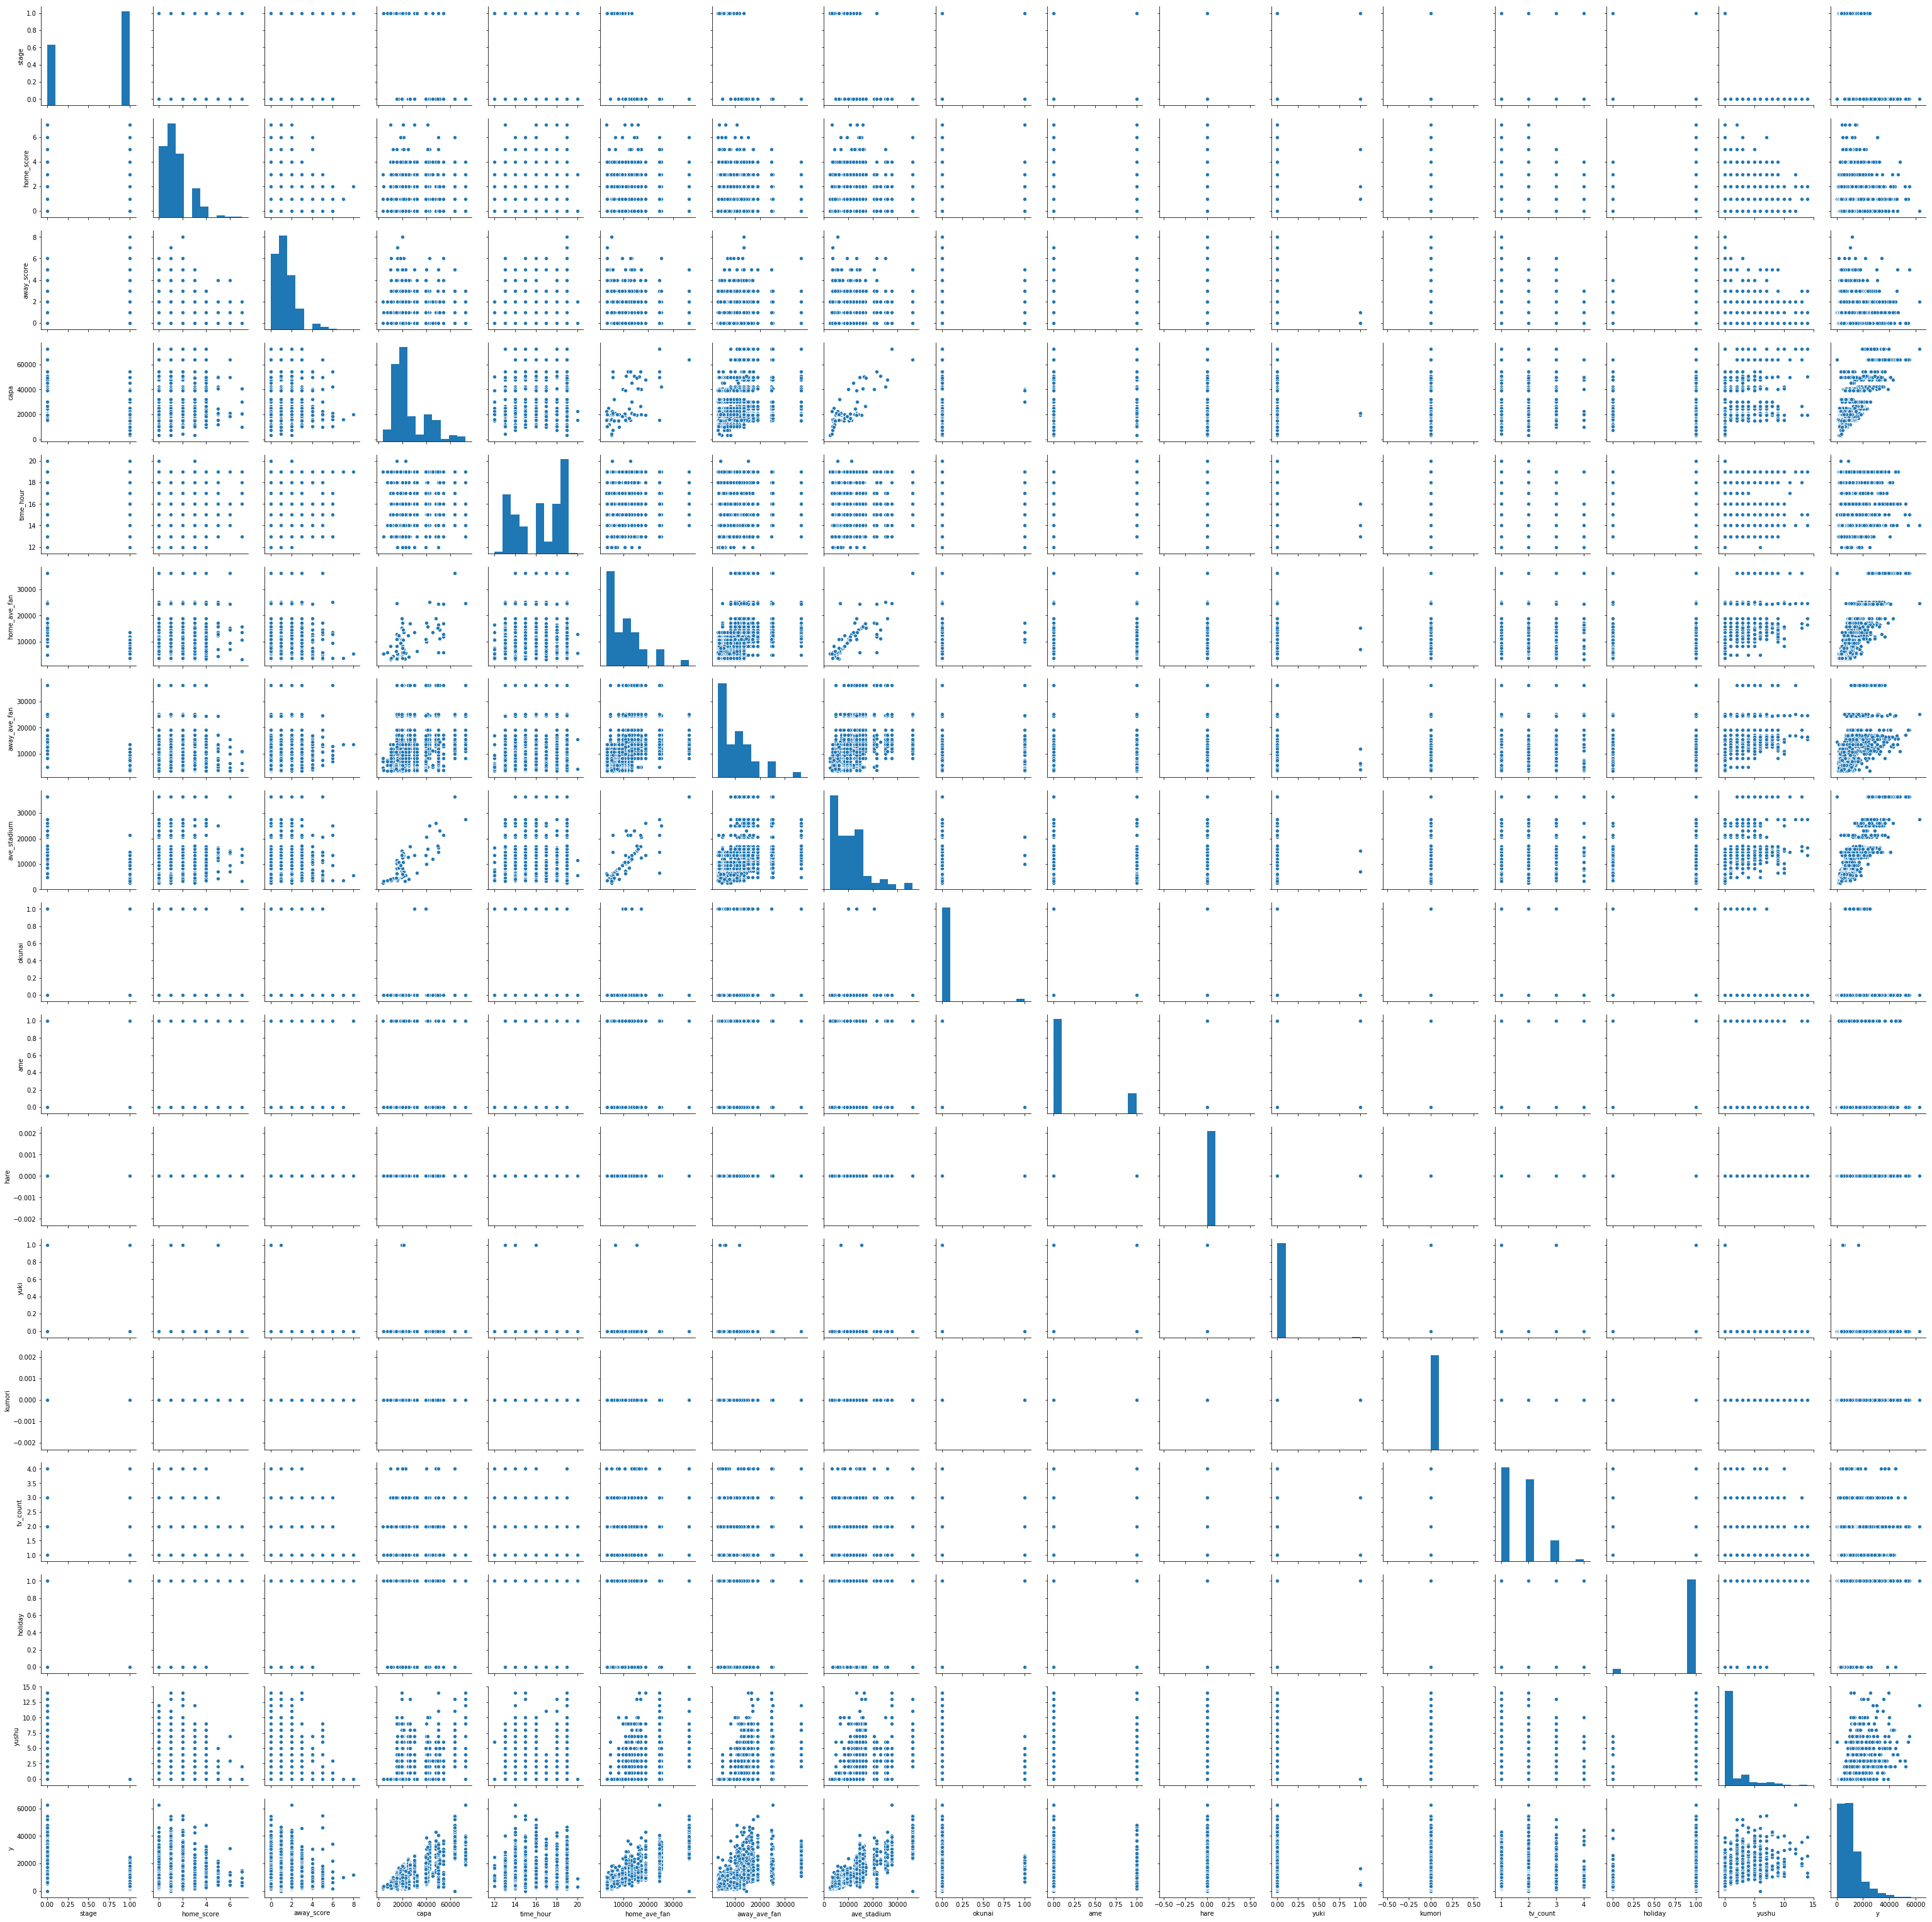

In [189]:
sns.pairplot(X.select_dtypes([np.int64, np.float64]))

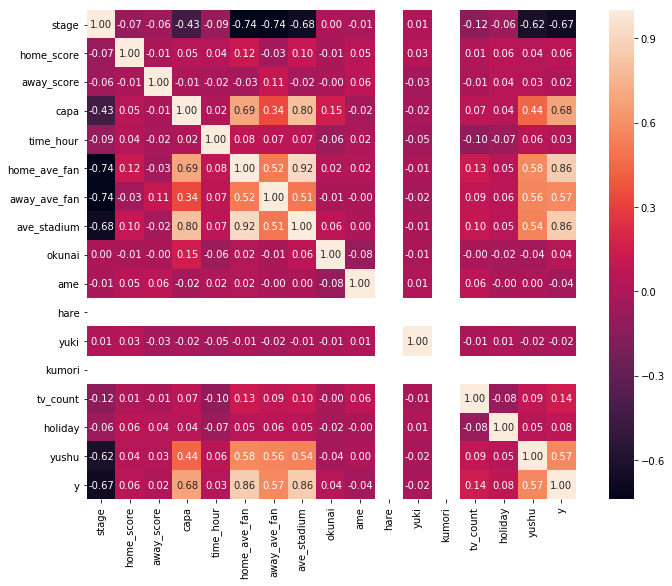

In [190]:
#ヒートマップの表示
plt.figure(figsize=(12,9))
sns.heatmap(X.corr(),annot=True,square=True,fmt=".2f")
plt.show()

In [183]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


In [184]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [185]:
#グリッドサーチで最適なパラを見つける。モデルは勾配ブースティングを用いる。

In [186]:
ss = StandardScaler()

In [209]:
X = all_train_df[["stage","home_score","away_score","capa","home_ave_fan","away_ave_fan","ave_stadium","tv_count","holiday","yushu"]].values
y = all_train_df[["y"]].values

In [210]:
# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [211]:
#ライブラリをインポート
from sklearn.ensemble import RandomForestRegressor as RFC
from sklearn.model_selection import GridSearchCV
#パラメーターサーチ
search_params = {
    'n_estimators':[5, 10, 50, 100, 500, 1000],
    'min_samples_split':[5, 10, 50, 100],
    'max_depth':[3, 5, 10, 50, 100]
}

gsr = GridSearchCV(
    RFC(),
    search_params, 
    cv = 3, 
    n_jobs = 1, 
    verbose = True
)

gsr.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Use

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 50, 100], 'max_depth': [3, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [212]:
from sklearn.metrics import mean_squared_error as mse
gsr.score(X_train, y_train)
y_pred = gsr.predict(X_train)
y_pred2 = gsr.predict(X_test)
print(np.sqrt(mse(y_train, y_pred)))
print(np.sqrt(mse(y_test, y_pred2)))

3158.4894228236253
3601.9042448078894


In [213]:
X1 = all_test_df[["stage","home_score","away_score","capa","home_ave_fan","away_ave_fan","ave_stadium","tv_count","holiday","yushu"]].values


In [214]:
y_pred3 = gsr.predict(X1)

In [215]:
y_pred3

array([14310.45525638, 14923.93937151, 15304.1416182 , 15471.87179413,
       15563.70264714, 18407.75211801, 14799.21321462, 13729.51187228,
       23887.59110344, 26361.58081271, 28649.08758939, 23962.81288827,
       23713.51924001, 26140.35572733, 24951.68528053, 31166.90307368,
       28813.83815753, 29531.44480175, 35079.78928875, 30322.20569776,
       30215.79501242, 29084.83279942, 35675.70023097,  4560.35576152,
        8517.87664873,  8433.88914444,  8098.41162137,  4842.95848922,
        9391.9771739 ,  8235.03738777,  8302.40749455, 10845.45859133,
       11378.67960907, 11217.07077508, 11259.08685223, 11256.34974652,
       11174.60933578, 11099.75056014, 11007.28919191, 19919.74813839,
       21003.56503228, 20612.09095156, 13286.85428778, 14857.20599268,
       14876.5615997 , 15061.18081377, 14837.39271746, 15033.05966198,
       14335.21902404, 14806.35611084, 15717.56039074, 15955.71793476,
       15348.63745311, 15601.15825571, 15772.3022517 , 15419.41991139,
      

In [234]:
temp = pd.DataFrame(y_pred3,columns=['y'])
resultDf1 = pd.concat((all_test_df,temp),axis=1)

In [235]:
resultDf1

,id,year,stage,match,gameday,time,home,away,stadium,tv,...,ame,yuki,hare,kumori,seisiki_tv,tv_count,weekday,holiday,yushu,y
0,15822,2014,0,第１８節第１日,08/02(土),19:04,0,7,0,"[スカパー, スカパー]",...,0,0,0,0,[スカパー],1.0,0,1,0.0,14310.455256
1,15840,2014,0,第２０節第１日,08/16(土),19:04,0,13,0,"[スカパー, スカパー]",...,0,0,0,0,[スカパー],1.0,0,1,0.0,14923.939372
2,15863,2014,0,第２２節第１日,08/30(土),19:04,0,10,0,"[スカパー, スカパー]",...,0,0,0,0,[スカパー],1.0,0,1,0.0,15304.141618
3,15885,2014,0,第２５節第１日,09/23(火・祝),14:04,0,18,0,"[スカパー, スカパー]",...,0,0,0,0,[スカパー],1.0,0,1,4.0,15471.871794
4,15903,2014,0,第２７節第１日,10/05(日),15:34,0,16,0,"[スカパー, スカパー, 東日本放送]",...,1,0,0,0,"[東日本放送, スカパー]",2.0,0,1,3.0,15563.702647
5,15912,2014,0,第２８節第１日,10/18(土),14:04,0,9,0,"[スカパー, スカパー]",...,0,0,0,0,[スカパー],1.0,0,1,6.0,18407.752118
6,15930,2014,0,第３０節第１日,10/26(日),13:04,0,8,0,"[スカパー, スカパー]",...,0,0,0,0,[スカパー],1.0,0,1,0.0,14799.213215
7,15957,2014,0,第３３節第１日,11/29(土),17:04,0,32,0,"[スカパー, スカパー]",...,1,0,0,0,[スカパー],1.0,0,1,0.0,13729.511872
8,15844,2014,0,第２０節第１日,08/16(土),19:04,11,7,11,"[スカパー, スカパー]",...,0,0,0,0,[スカパー],1.0,1,1,1.0,23887.591103
9,15940,2014,0,第３１節第１日,11/02(日),16:04,11,18,11,"[スカパー, スカパー]",...,1,0,0,0,[スカパー],1.0,0,1,5.0,26361.580813


In [236]:
resultDf1["seisiki_y"] = resultDf1[["capa","y"]].min(axis=1)

In [238]:
resultDf1["seisiki_y"]

0      14310.455256
1      14923.939372
2      15304.141618
3      15471.871794
4      15563.702647
5      18407.752118
6      14799.213215
7      13729.511872
8      23887.591103
9      26361.580813
10     28649.087589
11     23962.812888
12     23713.519240
13     26140.355727
14     24951.685281
15     31166.903074
16     28813.838158
17     29531.444802
18     35079.789289
19     30322.205698
20     30215.795012
21     29084.832799
22     35675.700231
23      4560.355762
24      8517.876649
25      8433.889144
26      8098.411621
27      4842.958489
28      9391.977174
29      8235.037388
           ...     
283     3502.406305
284     3502.406305
285     3981.184138
286     5168.225558
287     5010.781996
288     5191.766973
289     5003.833319
290     5184.985131
291     5111.663588
292     5101.690173
293     5113.857070
294     3905.020030
295     3866.807503
296     3868.479498
297     3833.914870
298     3868.479498
299     3852.094699
300     3868.479498
301     3453.351797


In [240]:
resultDf1[['id','seisiki_y']].to_csv('result.csv',header= False,index = False)